In [2]:
import numpy             as np
import pandas            as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import lux
import prince
from scipy import stats
from datetime import date
from datetime import datetime
from datetime import timedelta

### Lectura dela base de datos 

In [1]:
url_carpeta='C:/Users/Bluetab/Documents/Universidad/Archivos 2doSemestre/Visualizacion/'
url=url_carpeta+'application_record.csv'
df = pd.read_csv(url)
df1= pd.read_csv(url_carpeta+'credit_record.csv')

NameError: name 'pd' is not defined

In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


### Cambiar nombre de las columnas

In [5]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
renombrar = {'CODE_GENDER': 'GENERO',
            'FLAG_OWN_CAR': 'VEHICULO',
            'FLAG_OWN_REALTY': 'PROPIEDADES',
            'CNT_CHILDREN': 'CANT_HIJOS',
            'AMT_INCOME_TOTAL': 'ING_TOTAL_ANUAL',
            'NAME_INCOME_TYPE': 'ORIGEN_INGRESO',
            'NAME_EDUCATION_TYPE': 'NIV_ESTUDIO',
            'NAME_FAMILY_STATUS':  'ESTADO_CIVIL',
            'NAME_HOUSING_TYPE': 'T_VIVIENDA',
            'DAYS_BIRTH' : 'FECHA_NACIMIENTO',
            'DAYS_EMPLOYED': 'EMPLEADO',
            'FLAG_MOBIL': 'TIENE_CEL',
            'FLAG_WORK_PHONE': 'TIENE_TEL_TRJ',
            'FLAG_PHONE': 'TIENE_TELFIJO',
            'FLAG_EMAIL': 'TIENE_EMAIL',
            'OCCUPATION_TYPE':'T_OCUPACION',
            'CNT_FAM_MEMBERS': 'CANT_FAM'
           }
df.columns = [renombrar.get(x, x) for x in df.columns] 


In [7]:
df.head()

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Arreglar datos.

In [8]:
renombrar_ori_ingreso = {'Working': 'Trabajador',
            'Commercial associate': 'Asociado comercial',
            'Pensioner': 'Pensionado',
            'State servant': 'Servidor publico',
            'Student': 'Estudiante'
           }
renombrar_niv_estudio = {'Higher education': 'Educación superior',
            'Secondary / secondary special': 'Especial secundario/secundario',
            'Incomplete higher': 'Superior incompleto',
            'Lower secondary': 'Secundaria inferior',
            'Academic degree': 'Grado académico'
           }
renombrar_estado_civil = {'Civil marriage': 'Matrimonio civil',
            'Married': 'Casado',
            'Single / not married': 'Soltero',
            'Separated': 'Separado',
            'Widow': 'Viudo'
           }
renombrar_vivienda = {'Rented apartment': 'Apartamento alquilado',
            'House / apartment': 'Casa/apartamento',
            'Municipal apartment': 'Piso municipal',
            'Co-op apartment': 'Apt compartido',
            'Office apartment': 'Apartamento oficina',
            'With parents': 'Con padres'
           }
renombrar_ocupacion = {'Security staff': 'Personal de seguridad',
            'Sales staff': 'Personal de ventas',
            'Accountants': 'Contadores',
            'Laborers': 'Trabajadores',
            'Managers': 'Gerentes',
            'Drivers': 'Conductores',
            'Core staff': 'Personal básico',
            'High skill tech staff':  'Personal de alta tecnología de alta cualificación',
            'Cleaning staff': 'Personal de limpieza',
            'Private service staff' : 'Personal de servicio privado',
            'Cooking staff': 'Personal de cocina',
            'Low-skill Laborers': 'Trabajadores de baja cualificación',
            'Medicine staff': 'Personal de medicina',
            'Secretaries': 'Secretarios',
            'Waiters/barmen staff': 'Camareros',
            'HR staff':'Personal de recursos humanos',
            'Realty agents': 'Agentes de bienes raíces',
            'IT staff': 'Personal de TI'
           }
df.ORIGEN_INGRESO = [renombrar_ori_ingreso.get(x, x) for x in df.ORIGEN_INGRESO]
df.NIV_ESTUDIO = [renombrar_niv_estudio.get(x, x) for x in df.NIV_ESTUDIO] 
df.ESTADO_CIVIL = [renombrar_estado_civil.get(x, x) for x in df.ESTADO_CIVIL] 
df.T_VIVIENDA = [renombrar_vivienda.get(x, x) for x in df.T_VIVIENDA] 
df.T_OCUPACION = [renombrar_ocupacion.get(x, x) for x in df.T_OCUPACION] 

In [9]:
fecha_final = datetime(2020,1, 1)
df.FECHA_NACIMIENTO = [fecha_final - timedelta(days=-(n)) for n in df.FECHA_NACIMIENTO]
df.VEHICULO = [True if n=='Y' else False for n in df.VEHICULO]
df.PROPIEDADES = [True if n=='Y' else False for n in df.PROPIEDADES]

In [10]:
df

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,M,True,True,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
1,5008805,M,True,True,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
2,5008806,M,True,True,0,112500.0,Trabajador,Especial secundario/secundario,Casado,Casa/apartamento,1961-03-17,-1134,1,0,0,0,Personal de seguridad,2.0
3,5008808,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
4,5008809,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,False,True,0,135000.0,Pensionado,Especial secundario/secundario,Separado,Casa/apartamento,1957-10-21,365243,1,0,0,0,NaN,1.0
438553,6840222,F,False,False,0,103500.0,Trabajador,Especial secundario/secundario,Soltero,Casa/apartamento,1976-05-12,-3007,1,0,0,0,Trabajadores,1.0
438554,6841878,F,False,False,0,54000.0,Asociado comercial,Educación superior,Soltero,Con padres,1997-08-20,-372,1,1,0,0,Personal de ventas,1.0
438555,6842765,F,False,True,0,72000.0,Pensionado,Especial secundario/secundario,Casado,Casa/apartamento,1960-08-30,365243,1,0,0,0,NaN,2.0


In [11]:
df.describe().round(2)

,ID,CANT_HIJOS,ING_TOTAL_ANUAL,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,CANT_FAM
count,438557.00,438557.00,438557.00,438557.00,438557.0,438557.00,438557.00,438557.00,438557.00
mean,6022176.27,0.43,187524.29,60563.68,1.0,0.21,0.29,0.11,2.19
std,571637.02,0.72,110086.85,138767.80,0.0,0.40,0.45,0.31,0.90
min,5008804.00,0.00,26100.00,-17531.00,1.0,0.00,0.00,0.00,1.00
25%,5609375.00,0.00,121500.00,-3103.00,1.0,0.00,0.00,0.00,2.00
50%,6047745.00,0.00,160780.50,-1467.00,1.0,0.00,0.00,0.00,2.00
75%,6456971.00,1.00,225000.00,-371.00,1.0,0.00,1.00,0.00,3.00
max,7999952.00,19.00,6750000.00,365243.00,1.0,1.00,1.00,1.00,20.00


In [12]:
df.dtypes

ID                           int64
GENERO                      object
VEHICULO                      bool
PROPIEDADES                   bool
CANT_HIJOS                   int64
ING_TOTAL_ANUAL            float64
ORIGEN_INGRESO              object
NIV_ESTUDIO                 object
ESTADO_CIVIL                object
T_VIVIENDA                  object
FECHA_NACIMIENTO    datetime64[ns]
EMPLEADO                     int64
TIENE_CEL                    int64
TIENE_TEL_TRJ                int64
TIENE_TELFIJO                int64
TIENE_EMAIL                  int64
T_OCUPACION                 object
CANT_FAM                   float64
dtype: object

In [13]:
df
df1 = pd.DataFrame(data = df
             , columns = ['GENERO', 'ORIGEN_INGRESO', 'NIV_ESTUDIO', 'ESTADO_CIVIL',
       'T_VIVIENDA', 'T_OCUPACION'])

In [14]:
mca = prince.MCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto')
mca = mca.fit(df1)

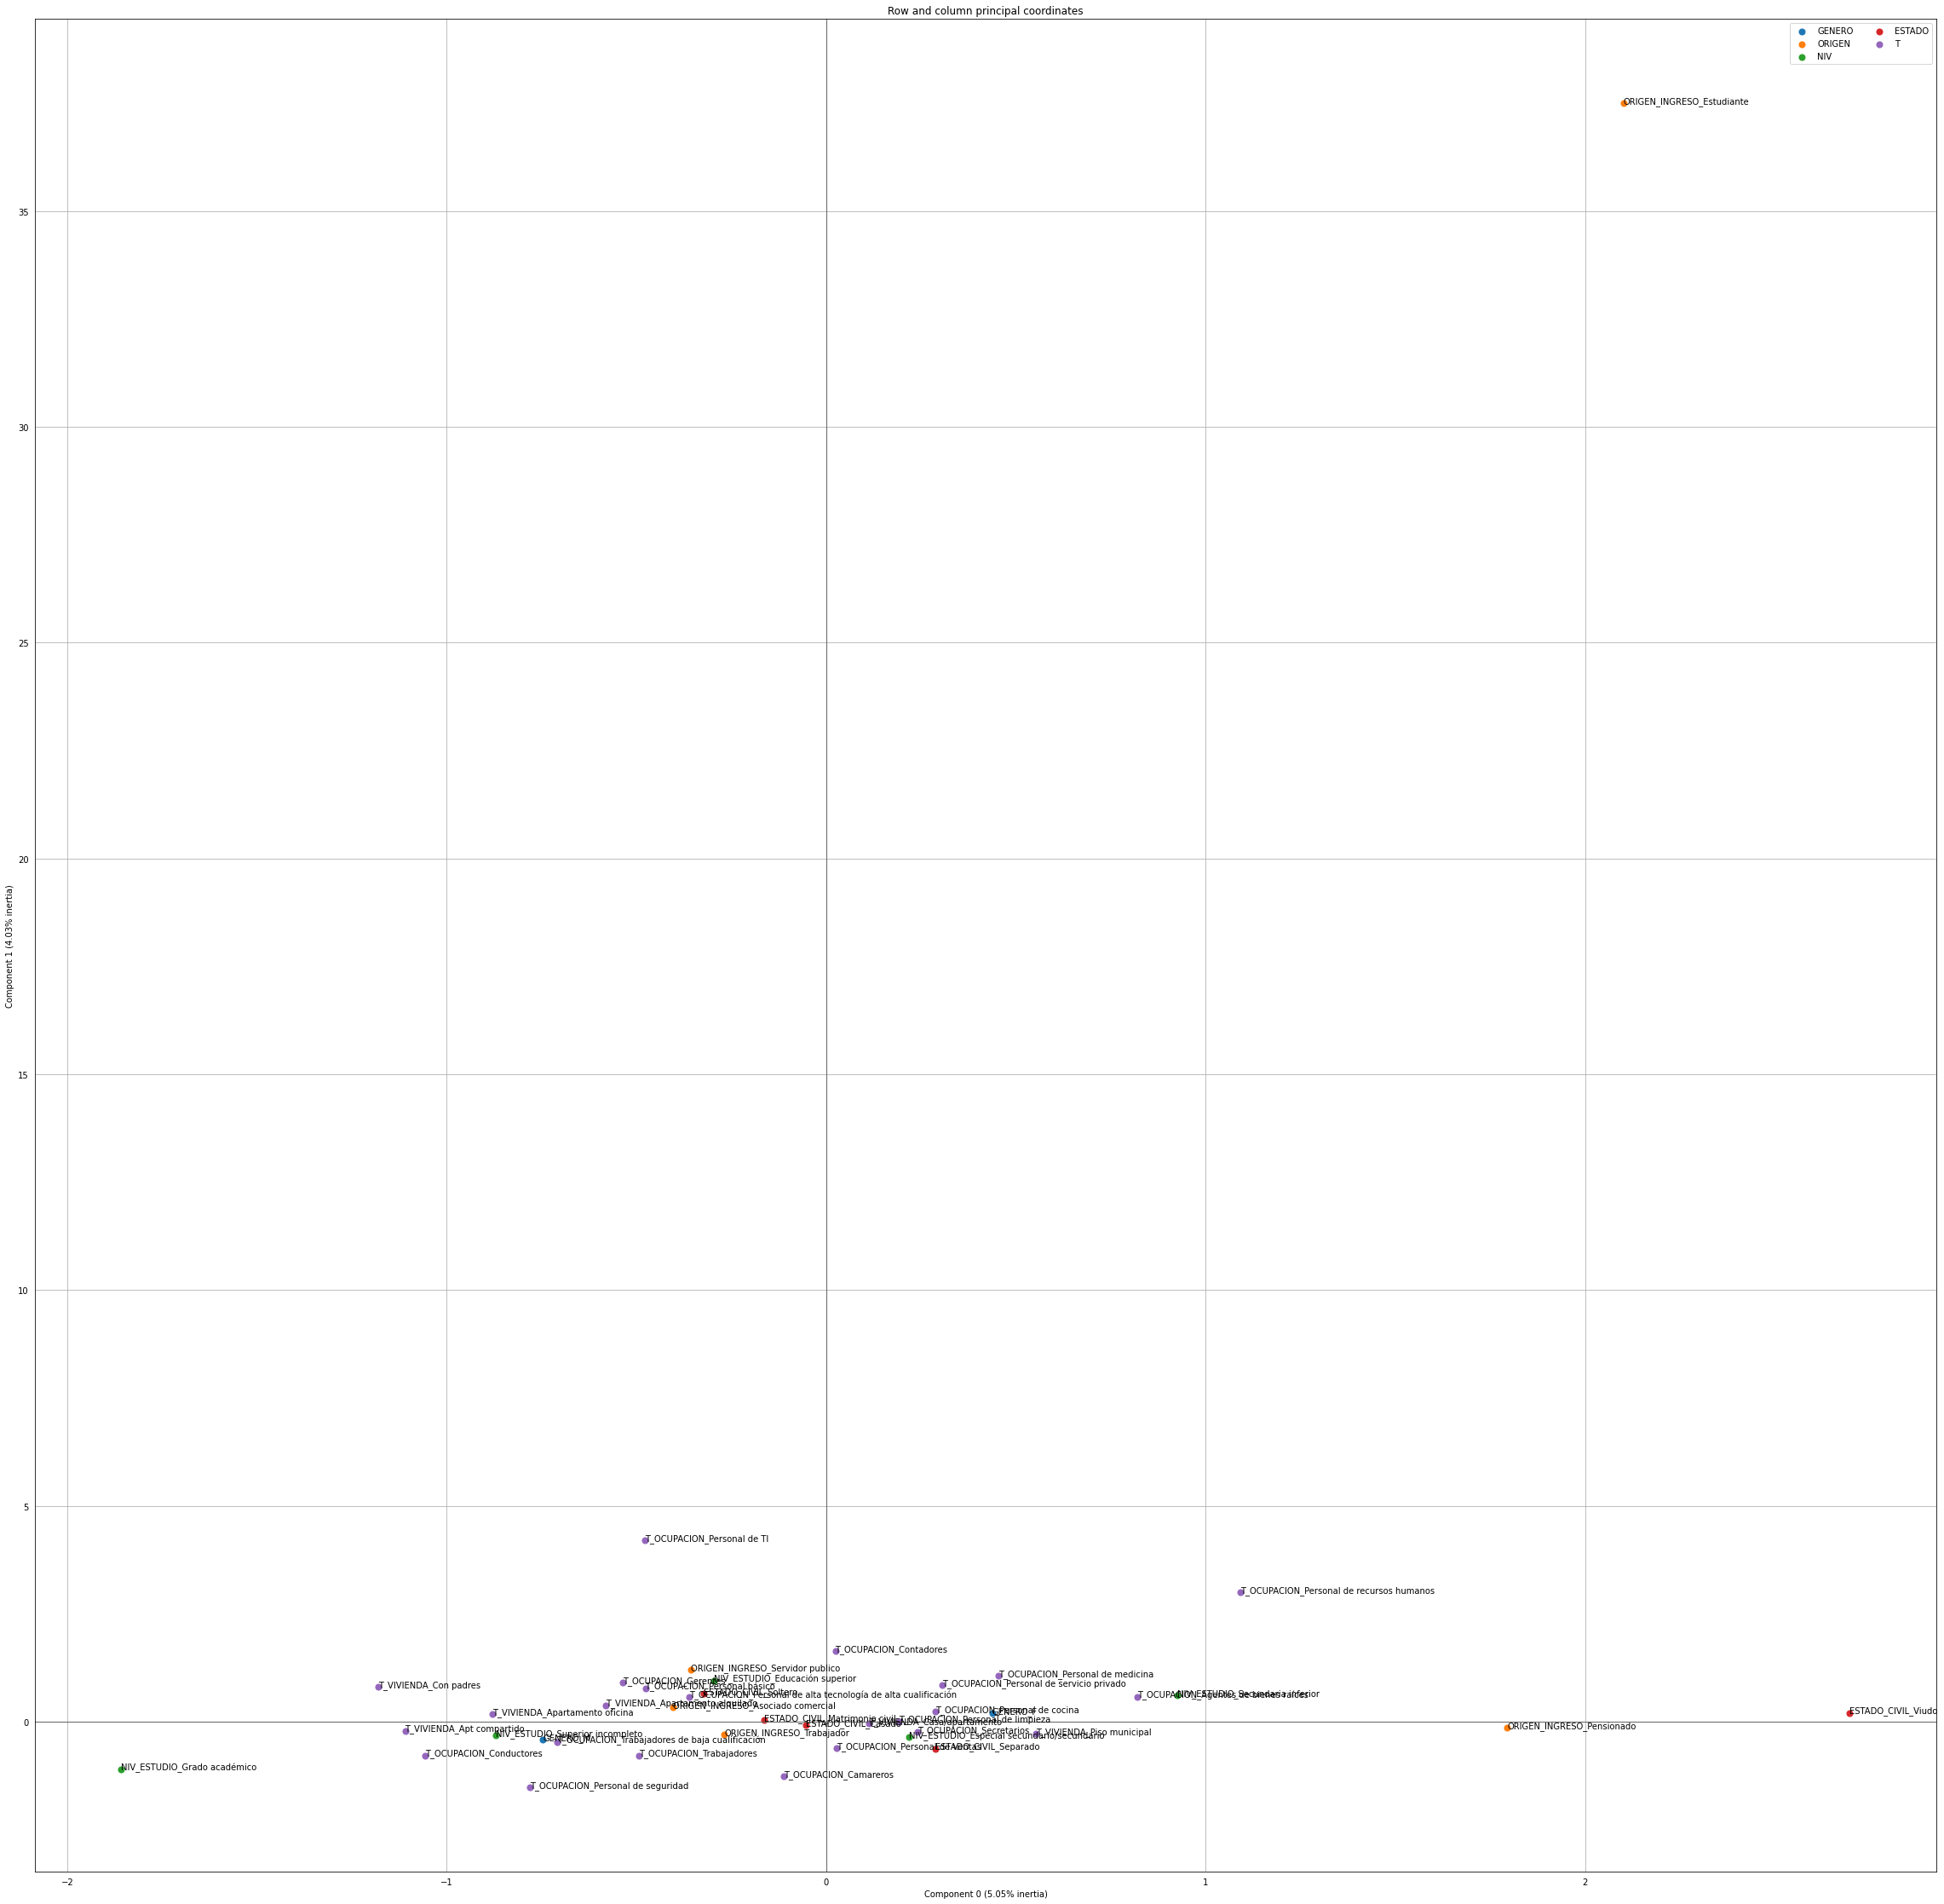

In [15]:
ax = mca.plot_coordinates(
    X=df1,
    ax=None,
    x_component=0,
    y_component=1,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=True,
    legend_n_cols=2)

In [16]:
mca.explained_inertia_

[0.05052946872268193,
 0.04034672097575432,
 0.036245571118827535,
 0.034292100728716954]

### Correlacion

In [36]:
def correlacion_spearman(datos,anotacion,ancho=20,alto=15):

    cuanti=datos.select_dtypes(np.number)

    correlacion_global=datos.corr(method='spearman')


    rho,p_value = stats.spearmanr(cuanti)
    rho = list(p_value)
    for i in range(len(p_value)):
        p_value[i]= list(p_value[i])
    p_value = pd.DataFrame(p_value)
    Significancia = p_value < 0.05


    mask =np.triu(correlacion_global, k=1)

    sns.set(font_scale=1.7)
    fig, scatter = plt.subplots(figsize = (ancho,alto))
    sns.heatmap(data=correlacion_global.round(decimals=2), 
                xticklabels=correlacion_global.columns,
                yticklabels=correlacion_global.columns,
                cmap='RdBu_r',
                annot=anotacion,
                linewidth=0.5,
                mask=mask)
    return fig

C:\Users\Bluetab\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Bluetab\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



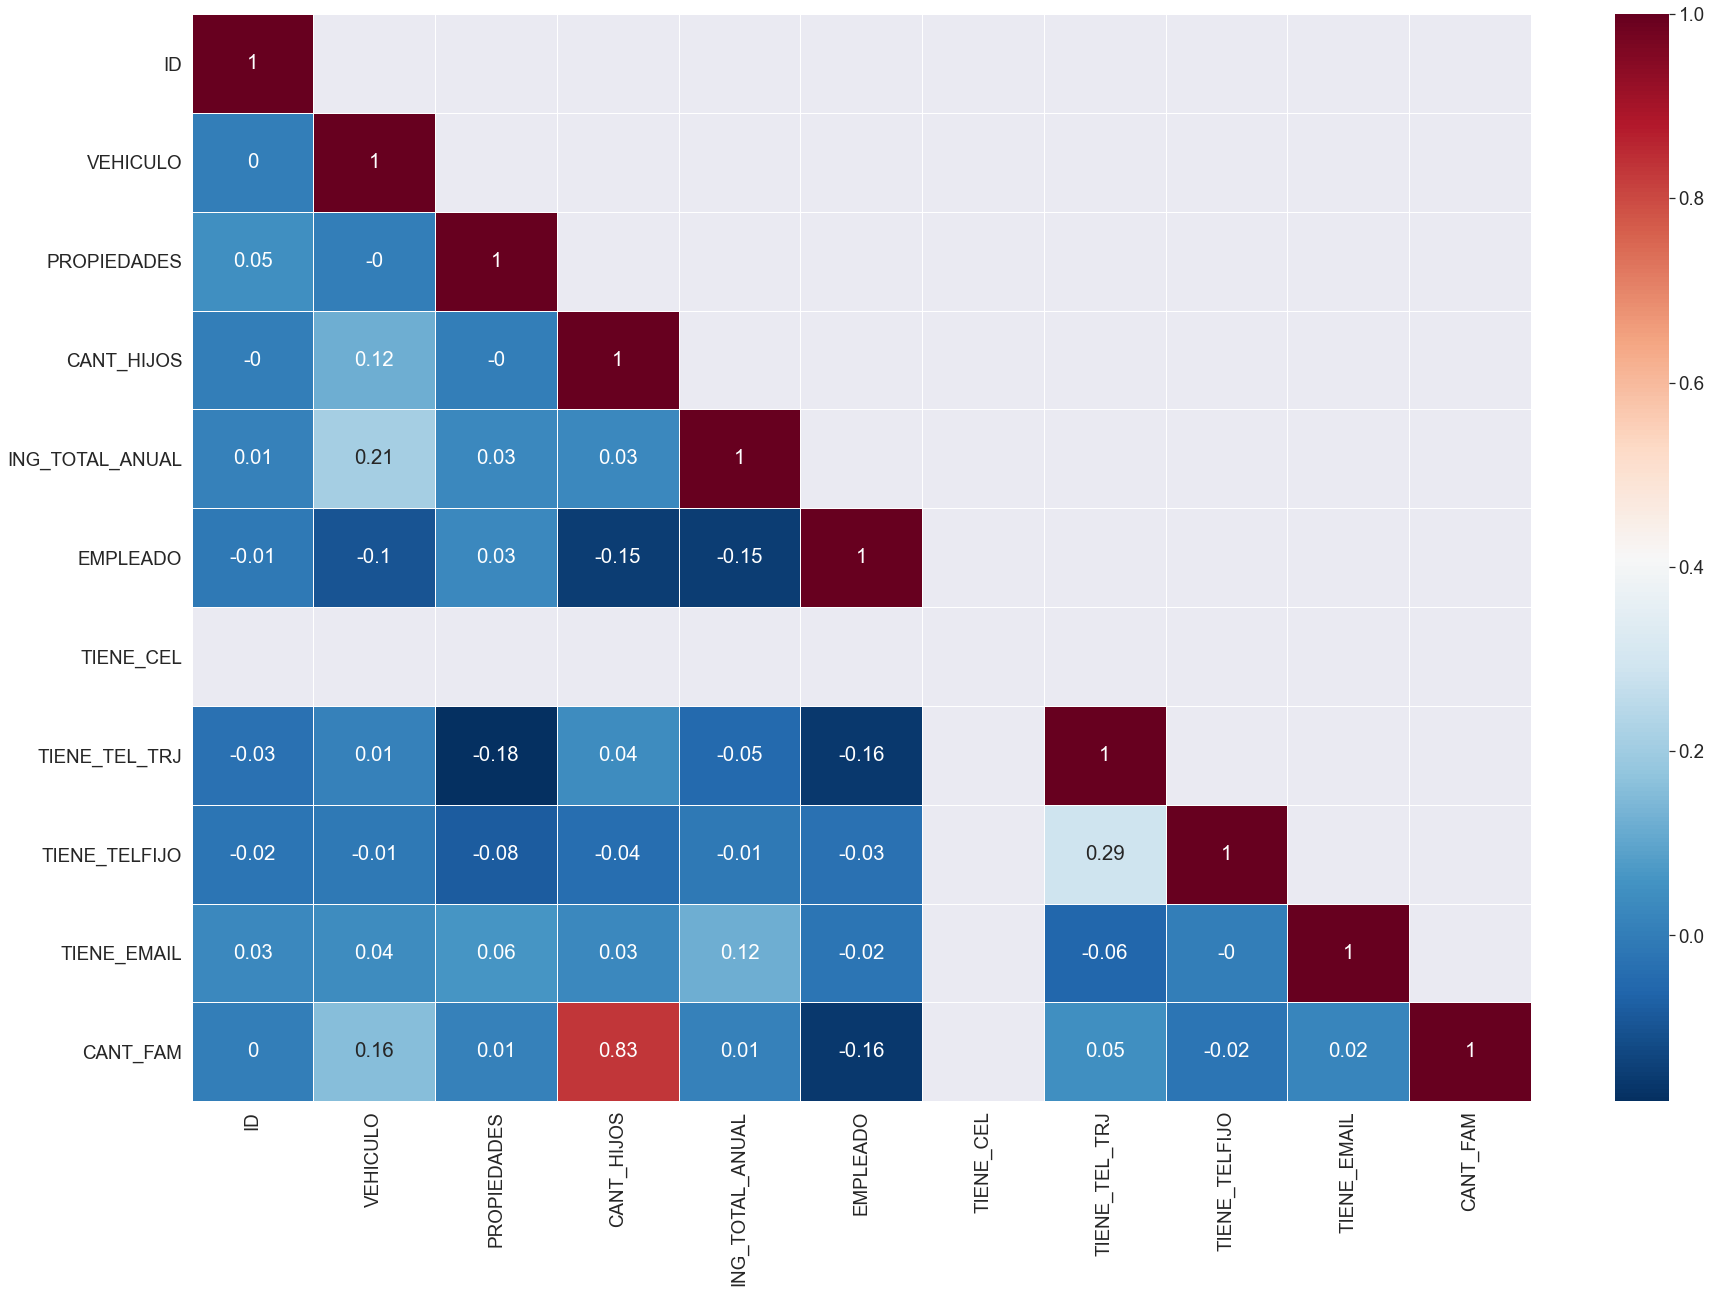

In [40]:
a=correlacion_spearman(df,True,30,20)

In [42]:
df.head(10)

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,M,True,True,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
1,5008805,M,True,True,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
2,5008806,M,True,True,0,112500.0,Trabajador,Especial secundario/secundario,Casado,Casa/apartamento,1961-03-17,-1134,1,0,0,0,Personal de seguridad,2.0
3,5008808,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
4,5008809,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
5,5008810,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
6,5008811,F,False,True,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
7,5008812,F,False,True,0,283500.0,Pensionado,Educación superior,Separado,Casa/apartamento,1958-07-01,365243,1,0,0,0,NaN,1.0
8,5008813,F,False,True,0,283500.0,Pensionado,Educación superior,Separado,Casa/apartamento,1958-07-01,365243,1,0,0,0,NaN,1.0
9,5008814,F,False,True,0,283500.0,Pensionado,Educación superior,Separado,Casa/apartamento,1958-07-01,365243,1,0,0,0,NaN,1.0


# Dash

In [45]:
from jupyter_dash import JupyterDash
import plotly_express as px
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from plotly import graph_objs as go
import dash_table


colors = {'background': '#111111',
    'text': '#7FDBFF',
    'rojo':'#FF1411',
    'negro': '#111111'}
app = JupyterDash(__name__)


app.layout = html.Div([
html.H1(children='Predicción de riesgo para aprobación de tarjetas de crédito',
           style={
            'textAlign': 'center',
            'backgroundColor': colors['negro'],
             'color': colors['text'], 'marginTop':20,'marginBottom': 10})
    ,
    html.H1(children='Data Set Variables Demográficas')
    ,
    ### Division horizontal
    html.Div([
        html.Div([
          dcc.Dropdown(id='variable', 
            options=[{'label': i, 'value': i} for i in df.columns.drop(['ID','FECHA_NACIMIENTO'])],
            value='GENERO',
                        placeholder="Select ",
            multi=False,
            style={"margin-left": "10px","margin-right": "300px"}) 
            
                ],style={'display': 'inline-block'})
        ,
        
        
      dcc.Graph(id='histo_1',style={'display': 'inline-block'})
        ,
    dcc.Graph(              id='histo_2',style={'display': 'inline-block'})
        
    ])

     ,
    html.H1(children='Data Set Habitos de pago')

       
])


@app.callback(
    Output('histo_1', 'figure'),
    [Input('variable', 'value')])
def update_output(value):
    fig = px.histogram(df, x=value)
    return fig



    
    


if __name__ == '__main__':
    app.run_server(debug=True)
   

Dash app running on http://127.0.0.1:8050/


In [20]:
# fig = px.histogram(df, x="GENERO")
# fig.show()

x=df.columns.drop(['ID','FECHA_NACIMIENTO'])
x

Index(['GENERO', 'VEHICULO', 'PROPIEDADES', 'CANT_HIJOS', 'ING_TOTAL_ANUAL',
       'ORIGEN_INGRESO', 'NIV_ESTUDIO', 'ESTADO_CIVIL', 'T_VIVIENDA',
       'EMPLEADO', 'TIENE_CEL', 'TIENE_TEL_TRJ', 'TIENE_TELFIJO',
       'TIENE_EMAIL', 'T_OCUPACION', 'CANT_FAM'],
      dtype='object')